In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

import numpy as np
import pandas as pd
from scipy.stats import norm

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from random import randint
from random import random

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

from modules.data_fetcher import download_historical_data
from modules.backtester import long_only_backtester


In [2]:
def measure_performances(y_true: np.ndarray, y_pred: np.ndarray, comment: str) -> None:
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{comment}: MAE={mae:.2f}, RMSE={rmse:.2f}, R2={r2:.2f}")


In [11]:
symbol = "BTC-USDT"
start_date = "2021-11-02"
df_BTC = download_historical_data(symbol, "1day").loc[start_date:]
df_BTC.dropna(inplace=True)
print(df_BTC.shape)
df_BTC.head()

(517, 7)


,Timestamp,Open,Close,High,Low,Amount,Volume
Date,,,,,,,
2021-11-02 01:00:00,1.635811e+09,60898.0,63221.9,64281.4,60635.0,7904.421631,4.956415e+08
2021-11-03 01:00:00,1.635898e+09,63221.9,62894.0,63506.8,60400.0,7189.072925,4.504493e+08
2021-11-04 01:00:00,1.635984e+09,62893.9,61401.9,63086.9,60700.0,6264.952940,3.865717e+08
2021-11-05 01:00:00,1.636070e+09,61401.9,60947.9,62604.0,60730.0,5158.714540,3.171539e+08
2021-11-06 01:00:00,1.636157e+09,60947.7,61467.1,61555.0,60050.0,4279.710517,2.604935e+08


In [12]:
hist = df_BTC[['Close']]
# Create Day Count, Price, and Change Lists
days = [i for i in range(1, len(hist['Close'])+1)]
price_orig = hist['Close'].tolist()
change = hist['Close'].pct_change().tolist()
change = change[1:]  # Removing the first term since it is NaN

# Statistics for Use in Model
mean = np.mean(change)
std_dev = np.std(change)
print('\nMean percent change: ' + str(round(mean*100, 2)) + '%')
print('Standard Deviation of percent change: ' +   
      str(round(std_dev*100, 2)) + '%')


Mean percent change: -0.1%
Standard Deviation of percent change: 3.3%


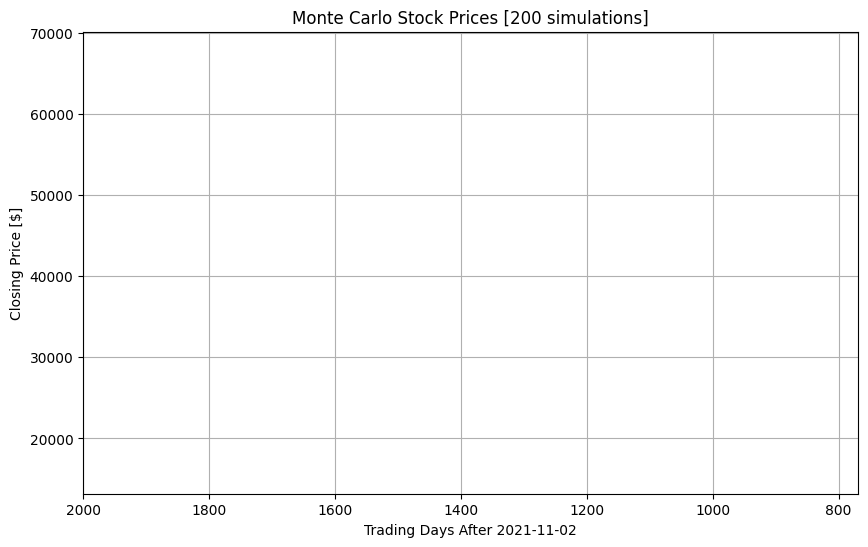

In [13]:
# Simulation Number and Prediction Period
simulations = 200 # Change for more results
days_to_sim = 1*252 # Trading days in 1 year

# Initializing Figure for Simulation
fig = plt.figure(figsize=[10, 6])
plt.plot(days, price_orig)
plt.title("Monte Carlo Stock Prices [" + str(simulations) + 
          " simulations]")
plt.xlabel("Trading Days After " + start_date)
plt.ylabel("Closing Price [$]")
plt.xlim([2000, len(days)+days_to_sim])
plt.grid()

# Initializing Lists for Analysis
close_end = []
above_close = []

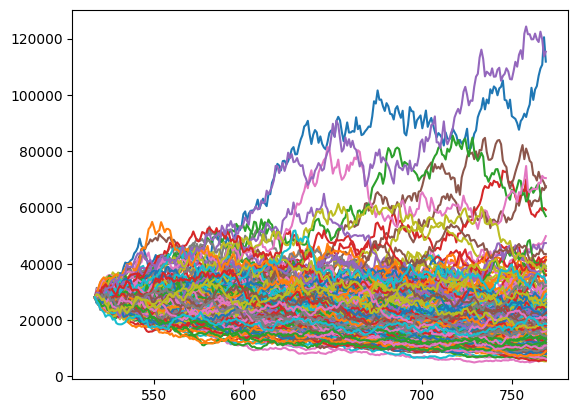

In [14]:
# For Loop for Number of Simulations Desired
for i in range(simulations):
    num_days = [days[-1]]
    close_price = [hist.iloc[-1, 0]]
    
    # For Loop for Number of Days to Predict
    for j in range(days_to_sim):
        num_days.append(num_days[-1]+1)
        perc_change = norm.ppf(random(), loc=mean, scale=std_dev)
        close_price.append(close_price[-1]*(1+perc_change))

    if close_price[-1] > price_orig[-1]:
        above_close.append(1)
    else:
        above_close.append(0)

    close_end.append(close_price[-1])
    plt.plot(num_days, close_price)

In [15]:
# Average Closing Price and Probability of Increasing After 1 Year
average_closing_price = sum(close_end)/simulations
average_perc_change = (average_closing_price-
                       price_orig[-1])/price_orig[-1]
probability_of_increase = sum(above_close)/simulations
print('\nPredicted closing price after ' + str(simulations) + 
      ' simulations: $' + str(round(average_closing_price, 2)))
print('Predicted percent increase after 1 year: ' + 
      str(round(average_perc_change*100, 2)) + '%')
print('Probability of stock price increasing after 1 year: ' + 
      str(round(probability_of_increase*100, 2)) + '%')




Predicted closing price after 200 simulations: $22595.38
Predicted percent increase after 1 year: -19.58%
Probability of stock price increasing after 1 year: 23.5%


# Other way

In [43]:
symbol = "BTC-USDT"
start_date = "2019-01-02"
df_BTC = download_historical_data(symbol, "1day").loc[start_date:]
df_BTC.dropna(inplace=True)
print(df_BTC.shape)
df_BTC.head()

(1552, 7)


,Timestamp,Open,Close,High,Low,Amount,Volume
Date,,,,,,,
2019-01-02 01:00:00,1.546387e+09,3799.644687,3856.504318,3880.257733,3750.000001,159.232564,606363.157893
2019-01-03 01:00:00,1.546474e+09,3857.633097,3765.999334,3862.600830,3728.917225,110.163702,419434.987418
2019-01-04 01:00:00,1.546560e+09,3767.854300,3791.461260,3821.195343,3706.000000,92.251254,346753.217345
2019-01-05 01:00:00,1.546646e+09,3789.000000,3772.156039,3838.674540,3756.410862,93.872993,356597.994443
2019-01-06 01:00:00,1.546733e+09,3775.703265,3988.471816,4023.000000,3746.584563,102.201639,400474.168150


In [44]:

def monte_carlo(
    closes:pd.Series,
    r: float | int = 0.02,
    nb_simulation: int = 100,
    trading_days_to_predict: int = 252
) -> np.array:
    s0 = closes.iloc[-1]
    tau = trading_days_to_predict / 252
    sigma = closes.pct_change().std()
    WT = np.random.normal(0.0, np.sqrt(tau), nb_simulation)
    return np.mean(s0 * np.exp((r - 0.5 * sigma**2) * tau + sigma * WT))

df_BTC["Montecarlo_prediction252"] = df_BTC.Close.rolling(1000).apply(lambda rows : monte_carlo(rows,nb_simulation=100,trading_days_to_predict=252))
df_BTC["Montecarlo_prediction100"] = df_BTC.Close.rolling(1000).apply(lambda rows : monte_carlo(rows,nb_simulation=100,trading_days_to_predict=100))
df_BTC["Montecarlo_prediction20"] = df_BTC.Close.rolling(1000).apply(lambda rows : monte_carlo(rows,nb_simulation=100,trading_days_to_predict=20))
df_BTC.dropna(inplace=True)

100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


In [45]:
ind = randint(1, len(df_BTC) - 100)

df_BTC_short = df_BTC.iloc[ind : ind + 100]
fig = make_subplots(
    rows=1,
    cols=1,
    subplot_titles=("Historical price forecasted"),
    shared_xaxes=True,
)

fig.add_trace(
    go.Candlestick(
        name="Historical price",
        x=df_BTC_short.index,
        open=df_BTC_short["Open"],
        high=df_BTC_short["High"],
        low=df_BTC_short["Low"],
        close=df_BTC_short["Close"],
    ),
    row=1,
    col=1,
)

fig.add_trace(
    go.Scatter(
        name="Forecast",
        x=df_BTC_short.index,
        y=df_BTC_short["Montecarlo_prediction252"],
    ),
    row=1,
    col=1,
)
fig.add_trace(
    go.Scatter(
        name="Forecast",
        x=df_BTC_short.index,
        y=df_BTC_short["Montecarlo_prediction100"],
    ),
    row=1,
    col=1,
)
fig.add_trace(
    go.Scatter(
        name="Forecast",
        x=df_BTC_short.index,
        y=df_BTC_short["Montecarlo_prediction20"],
    ),
    row=1,
    col=1,
) 
fig.update_layout(
    xaxis_rangeslider_visible=False,
    showlegend=True,
    title_text="Historical price and forecasted price",
)
fig.show()